# Heart Disease Classification

## Overview

The data science lifecycle is designed for big data issues and the data science projects. Generally, the data science project consists of seven steps which are problem definition, data collection, data preparation, data exploration, data modeling, model evaluation and model deployment.

In this project, I will go through these steps in order to build a heart disease classifier. To build the heart disease classifier by using [UCI heart disease](https://archive.ics.uci.edu/ml/datasets/statlog+(heart)) dataset.


### Dataset

The dataset has 14 attributes:

* **age:** age in years.

* **sex:** sex (1 = male; 0 = female).

* **cp:** chest pain type (Value 0: typical angina; Value 1: atypical angina; Value 2: non-anginal pain; Value 3: asymptomatic).

* **trestbps:** resting blood pressure in mm Hg on admission to the hospital.

* **chol:** serum cholestoral in mg/dl.

* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

* **restecg:** resting electrocardiographic results (Value 0: normal; Value 1: having ST-T wave abnormality; Value 2: probable or definite left ventricular hypertrophy).

* **thalach:** maximum heart rate achieved.

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **oldpeak:** ST depression induced by exercise relative to rest.

* **slope:** the slope of the peak exercise ST segment (Value 0: upsloping; Value 1: flat; Value 2: downsloping).

* **ca:** number of major vessels (0-3) colored by flourosopy.

* **thal:** thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

* **target:** heart disease (1 = no, 2 = yes)


## Import Libraries

In [7]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

## 1. Data Preparation and Data Exploration

In [8]:
# Read data in the excel file
df = pd.read_csv('/content/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
df.shape

(270, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [11]:
#Check null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
df['target'].value_counts()

,count
target,
1,150
2,120


In [13]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100

,count
target,
1,55.555556
2,44.444444


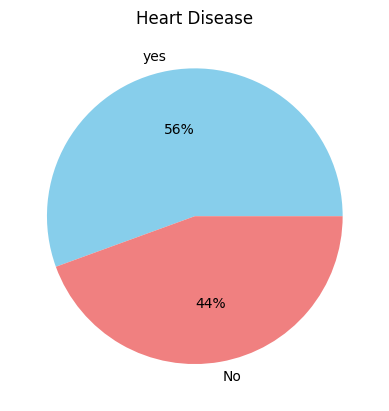

In [29]:
# Create a plot to display the percentage of the positive and negative heart disease
labels = ['yes', 'No']
values = df['target'].value_counts().values

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']  # Example colors

plt.pie(values, labels=labels, autopct='%1.0f%%', colors=colors)
plt.title('Heart Disease')
plt.show()


**Note:**

As you can see, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

### Attributes Correlation

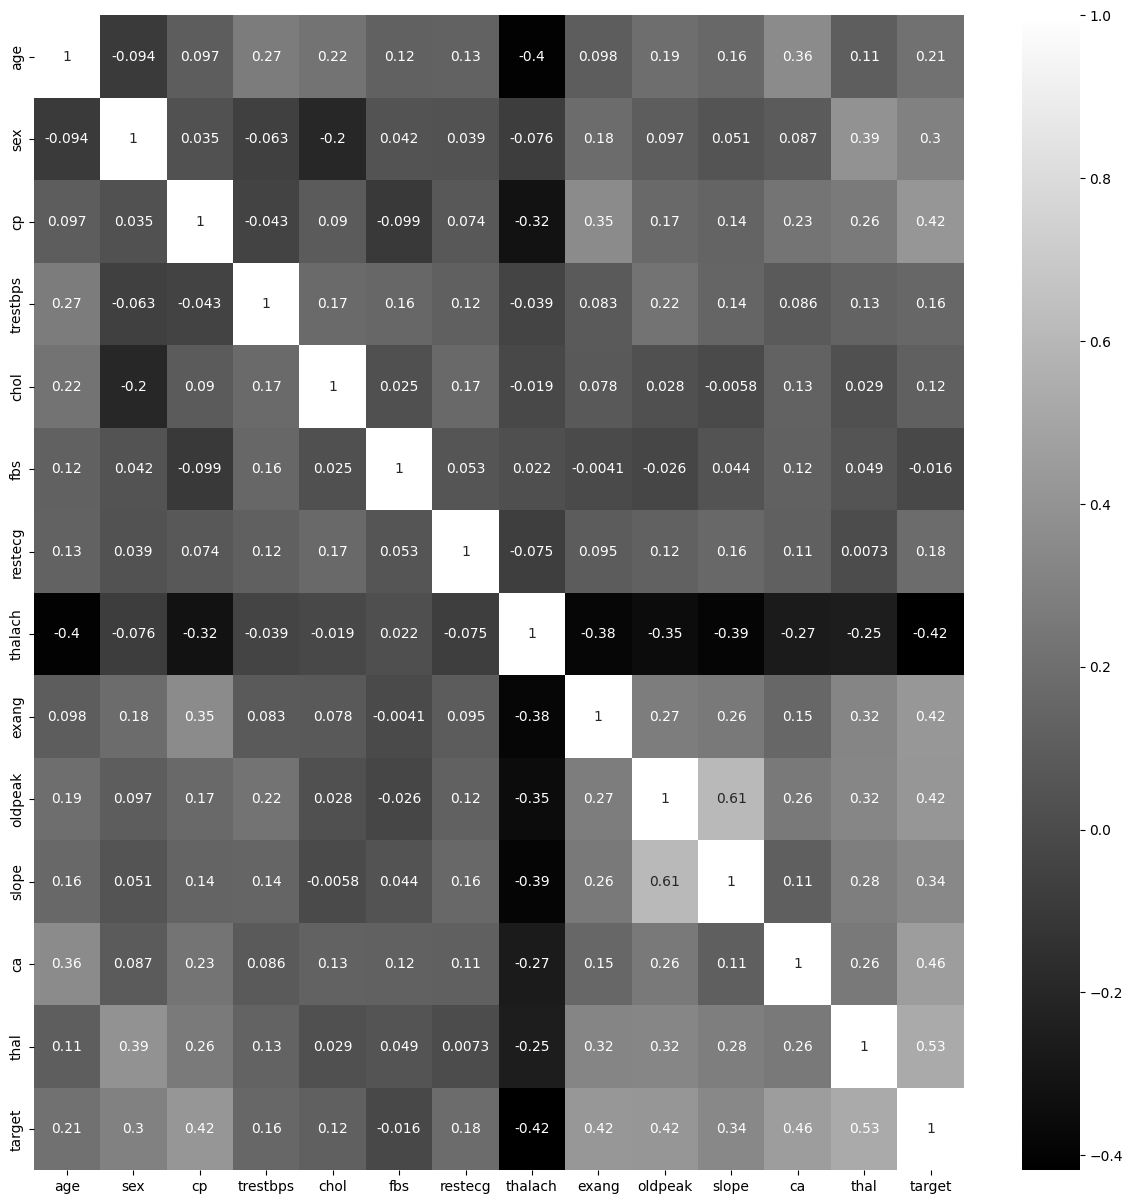

In [28]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "gray")
plt.show()

**Note:**

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.  We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.



Next, I will explore each attribute and then explore the found correlations.

### Age Exploration


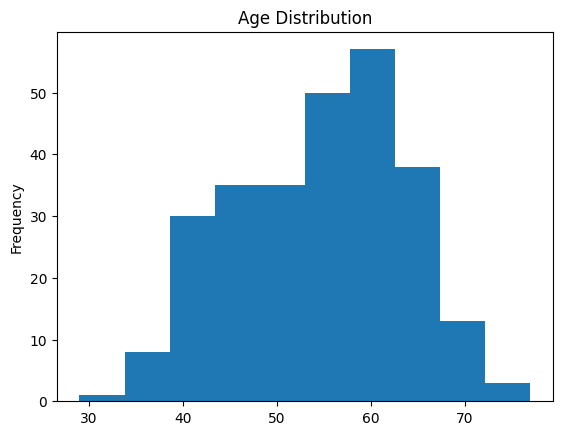

In [31]:
# Display age distribution

df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')

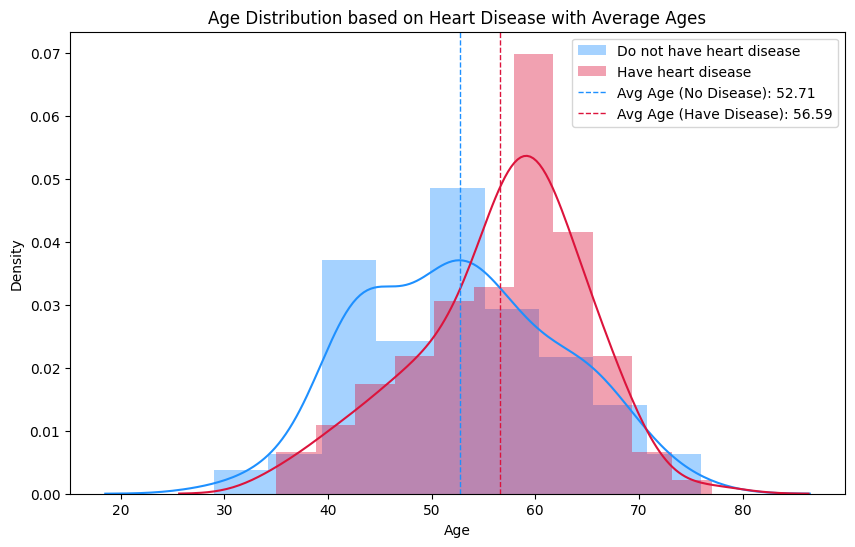

In [40]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df['target'] == 1]['age'], label='Do not have heart disease', color='dodgerblue')
sns.distplot(df[df['target'] == 2]['age'], label='Have heart disease', color='crimson')

# Calculate the average age for each group
avg_age_no_disease = df[df['target'] == 1]['age'].mean()
avg_age_disease = df[df['target'] == 2]['age'].mean()

# Add vertical lines for the average ages
plt.axvline(avg_age_no_disease, color='dodgerblue', linestyle='dashed', linewidth=1,
            label=f'Avg Age (No Disease): {avg_age_no_disease:.2f}')
plt.axvline(avg_age_disease, color='crimson', linestyle='dashed', linewidth=1,
            label=f'Avg Age (Have Disease): {avg_age_disease:.2f}')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution based on Heart Disease with Average Ages')
plt.legend()
plt.show()

**Note:**

From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



### Gender Exploration

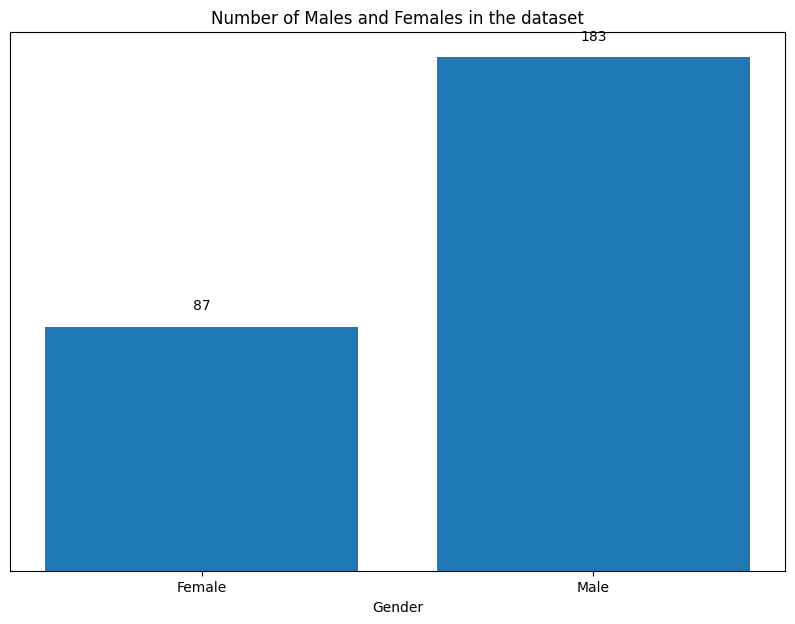

In [44]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 7))
bars=ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

# Remove y-axis ticks
ax.set_yticks([])

plt.show()

### Chest Pain Type Exploration

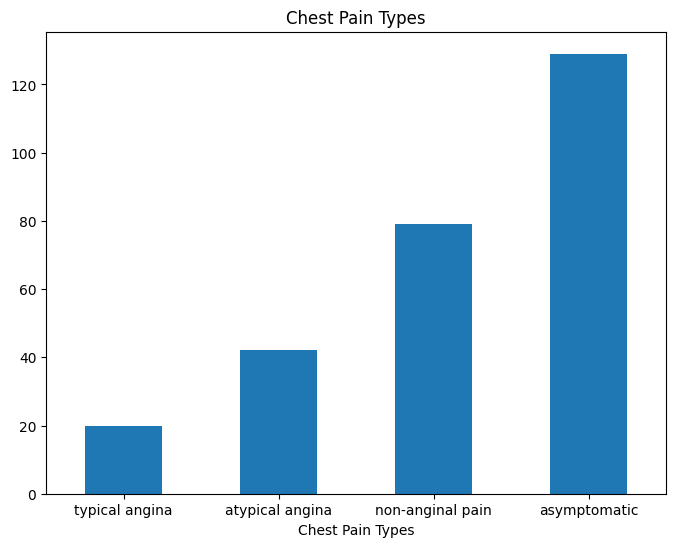

In [45]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

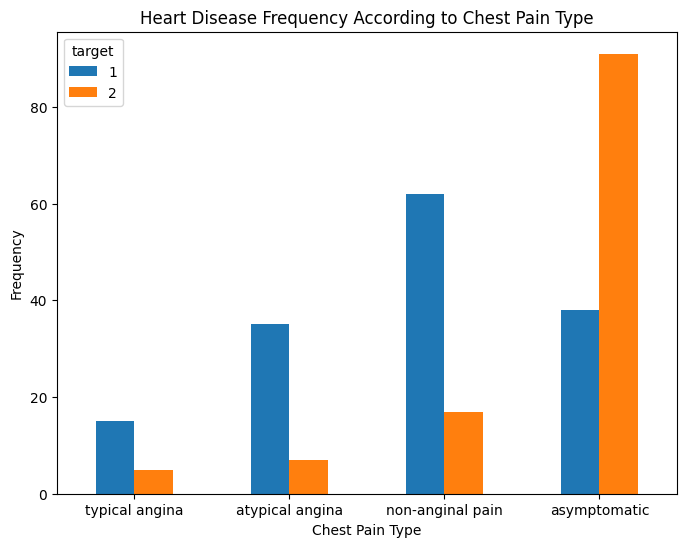

In [46]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.



### Blood Pressure Exploration

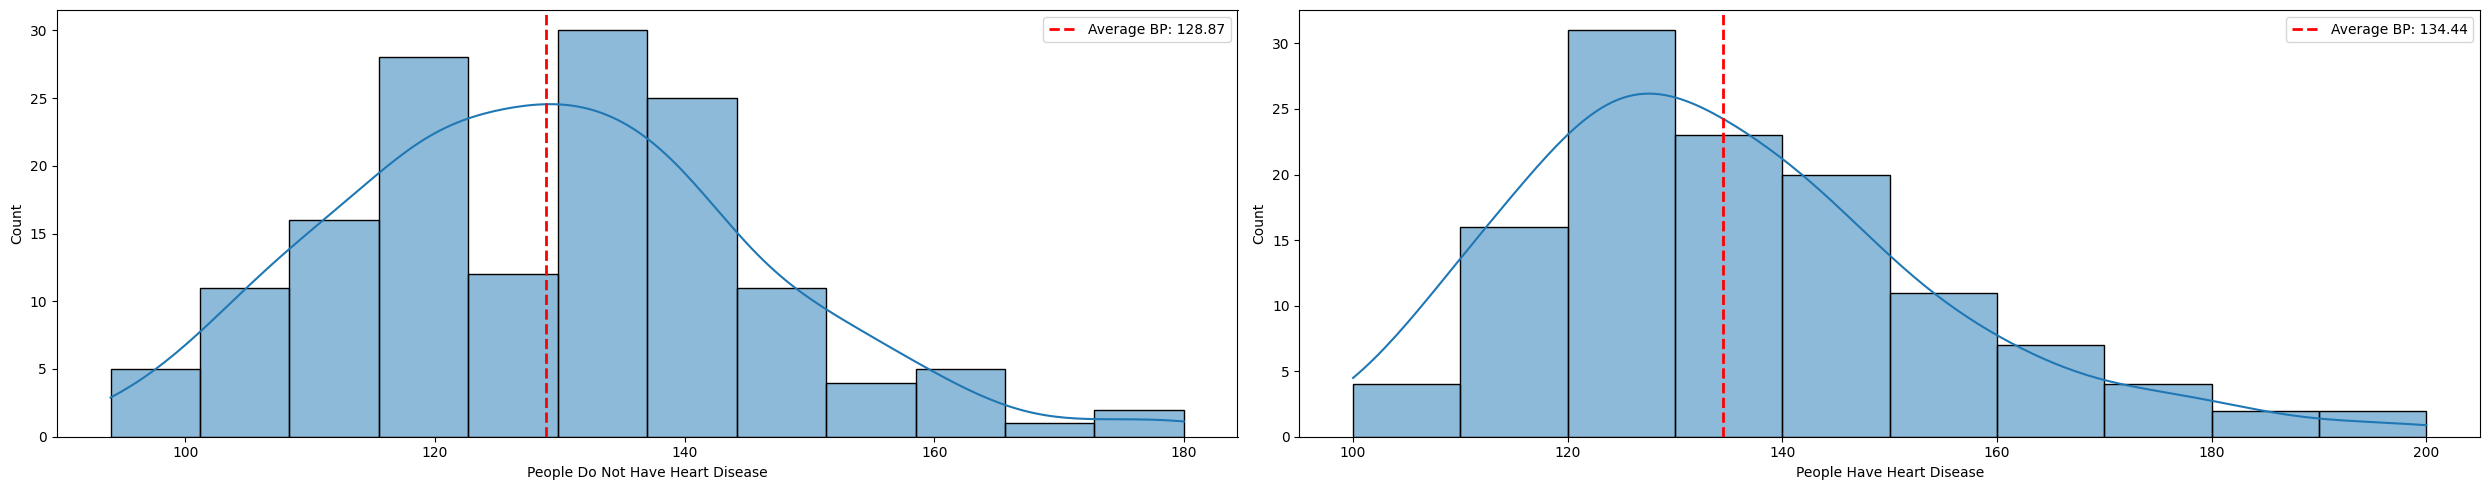

In [49]:
# Calculate averages
mean_no_hd = df[df['target'] == 1]['trestbps'].mean()
mean_hd = df[df['target'] == 2]['trestbps'].mean()

# Plot
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

# People without heart disease
ax1 = sns.histplot(df[df['target'] == 1]['trestbps'], kde=True, ax=axis1)
ax1.set(xlabel='People Do Not Have Heart Disease')
ax1.axvline(mean_no_hd, color='red', linestyle='--', linewidth=2, label=f'Average BP: {mean_no_hd:.2f}')
ax1.legend()

# People with heart disease
ax2 = sns.histplot(df[df['target'] == 2]['trestbps'], kde=True, ax=axis2)
ax2.set(xlabel='People Have Heart Disease')
ax2.axvline(mean_hd, color='red', linestyle='--', linewidth=2, label=f'Average BP: {mean_hd:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

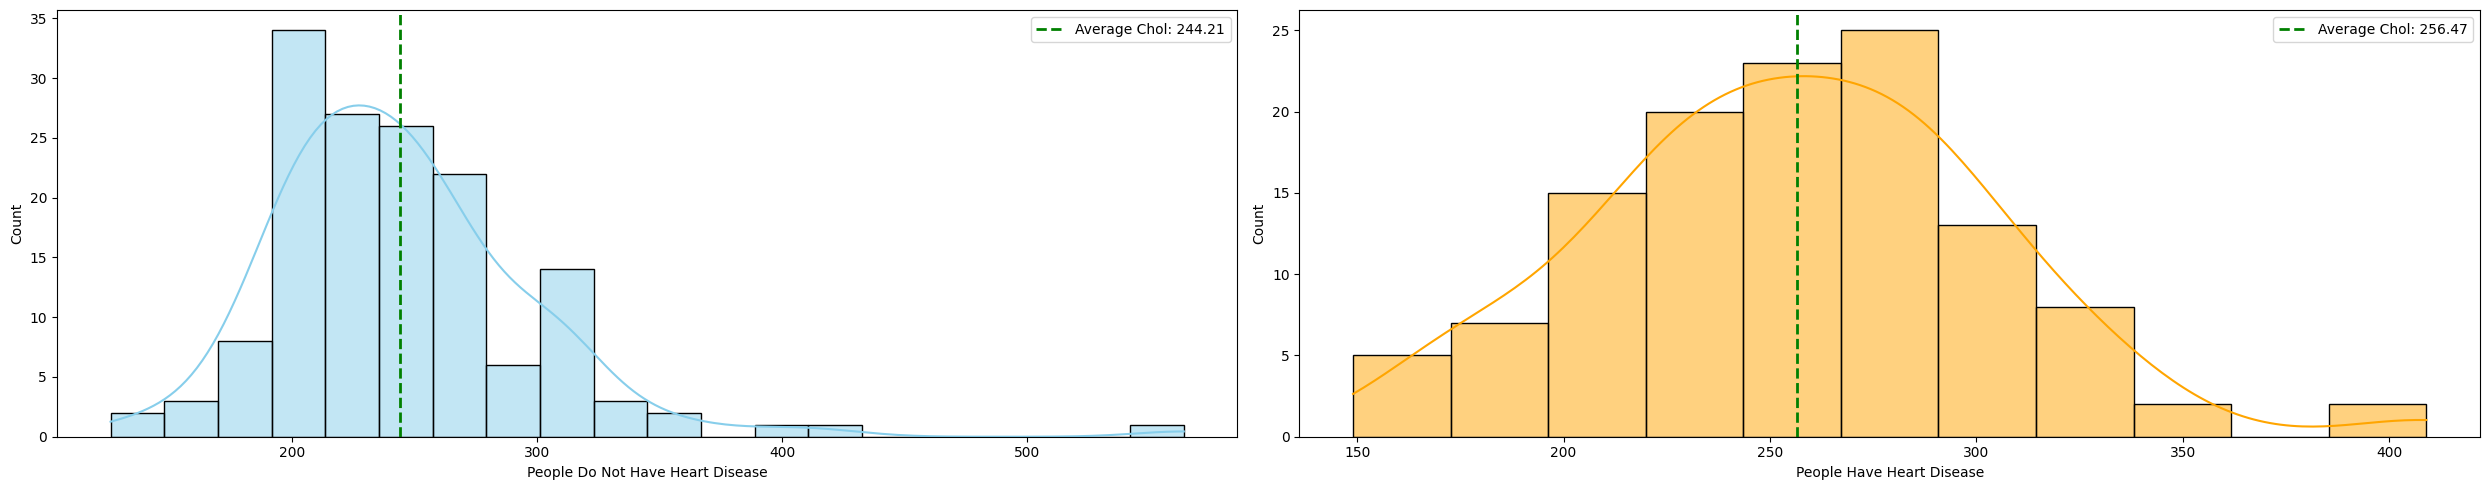

In [50]:
# Calculate average cholesterol levels
mean_no_hd_chol = df[df['target'] == 1]['chol'].mean()
mean_hd_chol = df[df['target'] == 2]['chol'].mean()

# Plot
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

# People without heart disease
ax1 = sns.histplot(df[df['target'] == 1]['chol'], kde=True, ax=axis1, color='skyblue')
ax1.set(xlabel='People Do Not Have Heart Disease')
ax1.axvline(mean_no_hd_chol, color='green', linestyle='--', linewidth=2, label=f'Average Chol: {mean_no_hd_chol:.2f}')
ax1.legend()

# People with heart disease
ax2 = sns.histplot(df[df['target'] == 2]['chol'], kde=True, ax=axis2, color='orange')
ax2.set(xlabel='People Have Heart Disease')
ax2.axvline(mean_hd_chol, color='green', linestyle='--', linewidth=2, label=f'Average Chol: {mean_hd_chol:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

### Fasting Blood Sugar  Exploration

###  Electrocardiographic Results Exploration

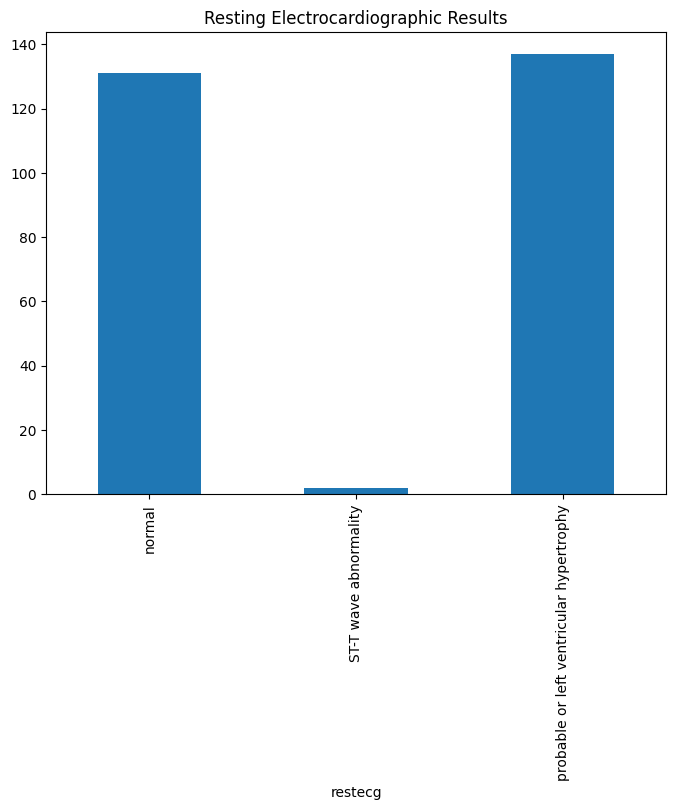

In [51]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

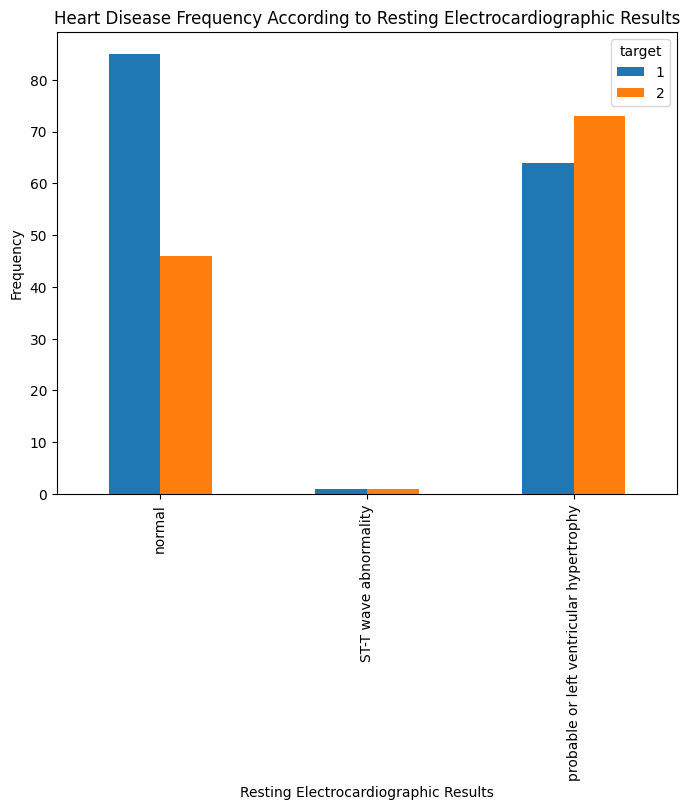

In [52]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### Maximum Heart Rate Exploration

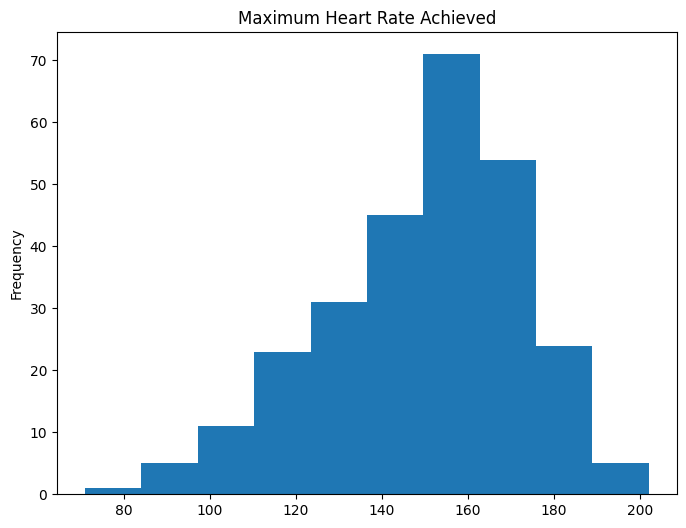

In [53]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

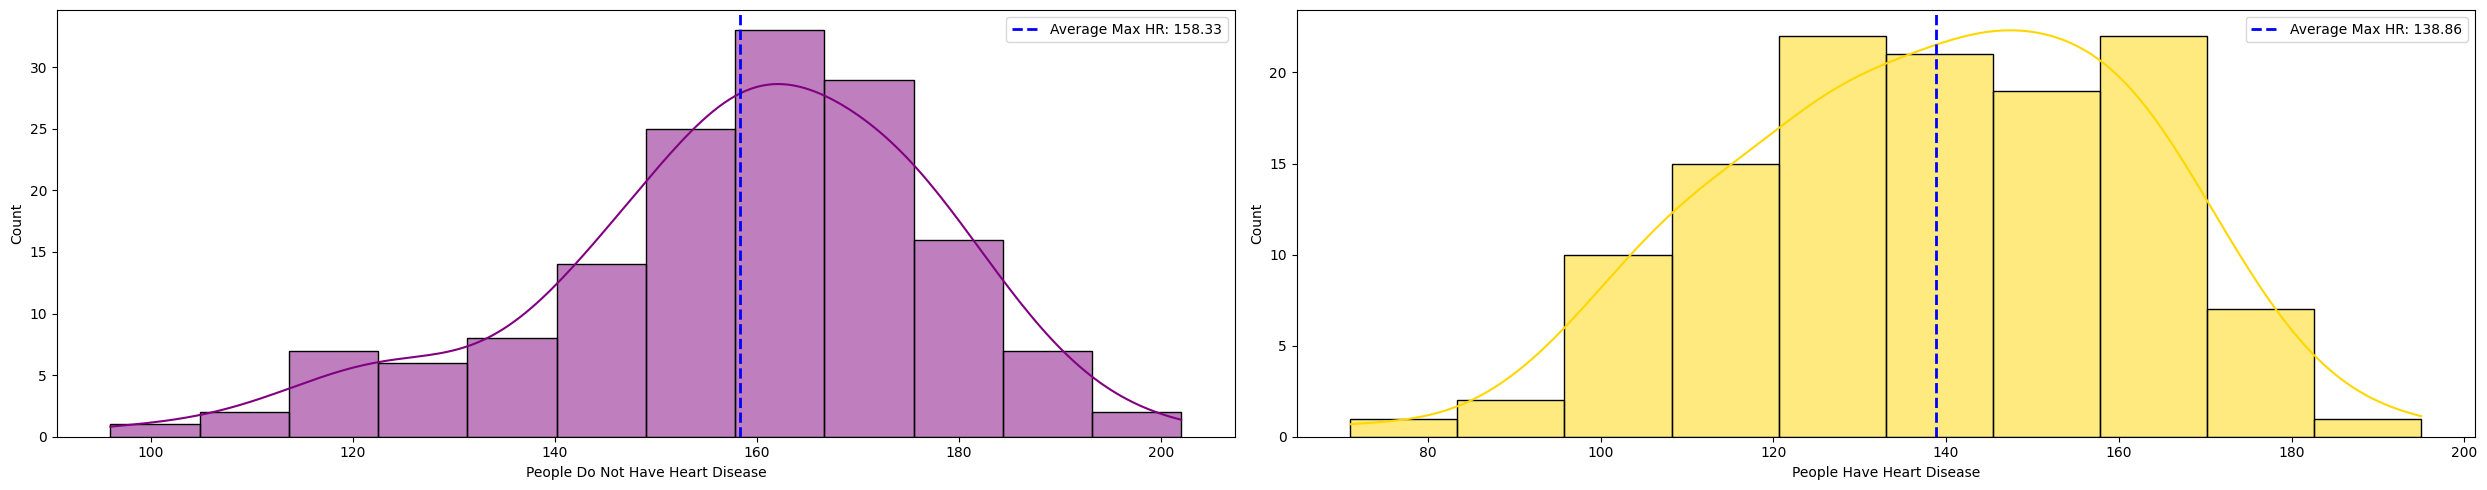

In [54]:
# Calculate average maximum heart rate
mean_no_hd_thalach = df[df['target'] == 1]['thalach'].mean()
mean_hd_thalach = df[df['target'] == 2]['thalach'].mean()

# Plot
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

# People without heart disease
ax1 = sns.histplot(df[df['target'] == 1]['thalach'], kde=True, ax=axis1, color='purple')
ax1.set(xlabel='People Do Not Have Heart Disease')
ax1.axvline(mean_no_hd_thalach, color='blue', linestyle='--', linewidth=2, label=f'Average Max HR: {mean_no_hd_thalach:.2f}')
ax1.legend()

# People with heart disease
ax2 = sns.histplot(df[df['target'] == 2]['thalach'], kde=True, ax=axis2, color='gold')
ax2.set(xlabel='People Have Heart Disease')
ax2.axvline(mean_hd_thalach, color='blue', linestyle='--', linewidth=2, label=f'Average Max HR: {mean_hd_thalach:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

**Note:**

The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina Exploration

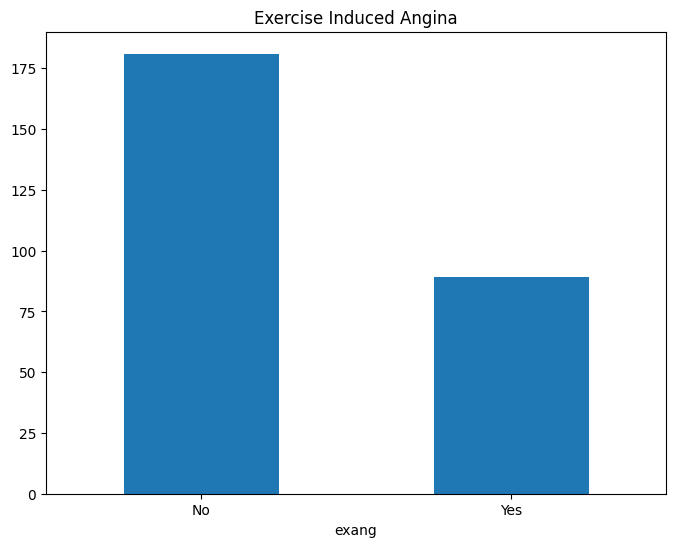

In [55]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

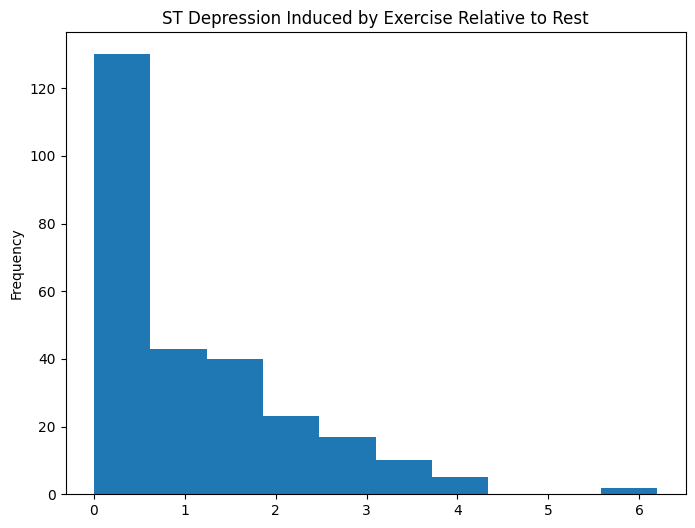

In [56]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

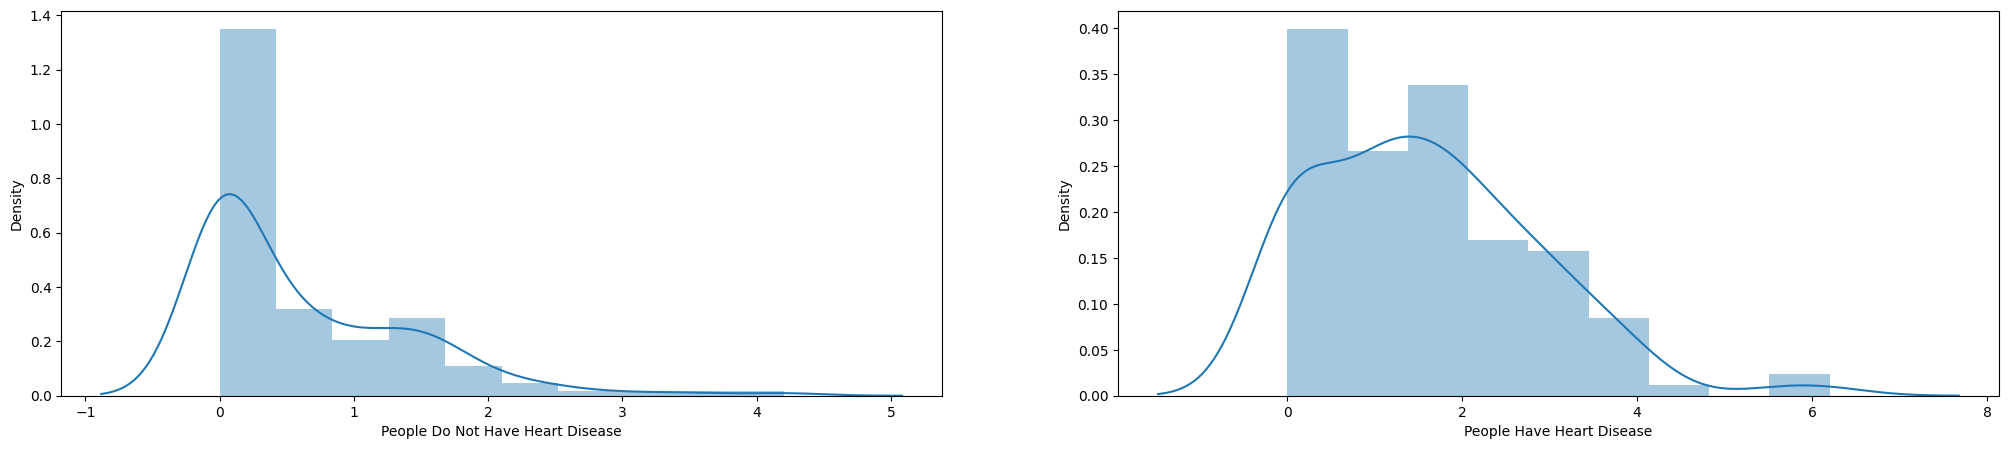

In [57]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

**Note:**

The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5.

### Slope Exploration

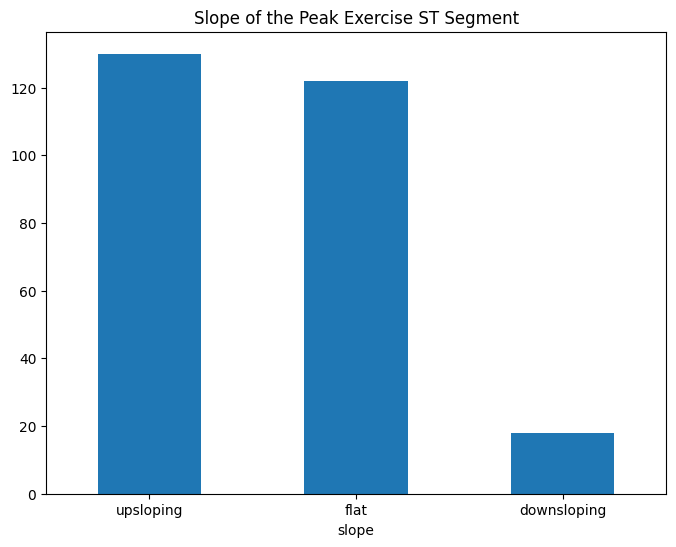

In [58]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

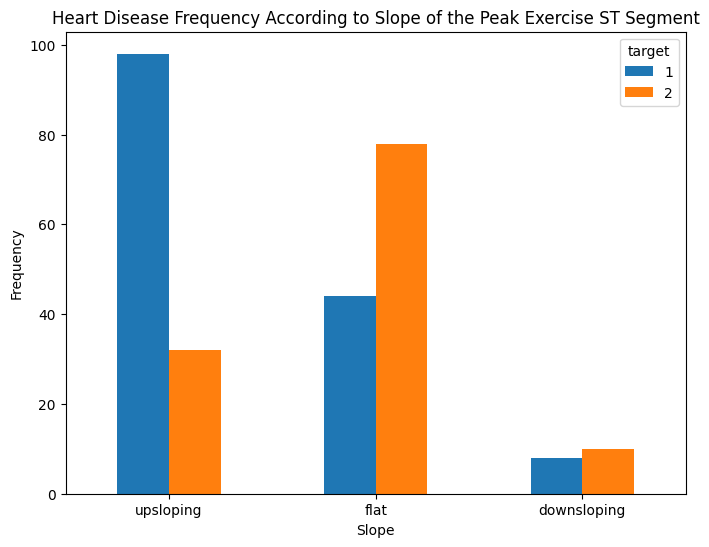

In [59]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

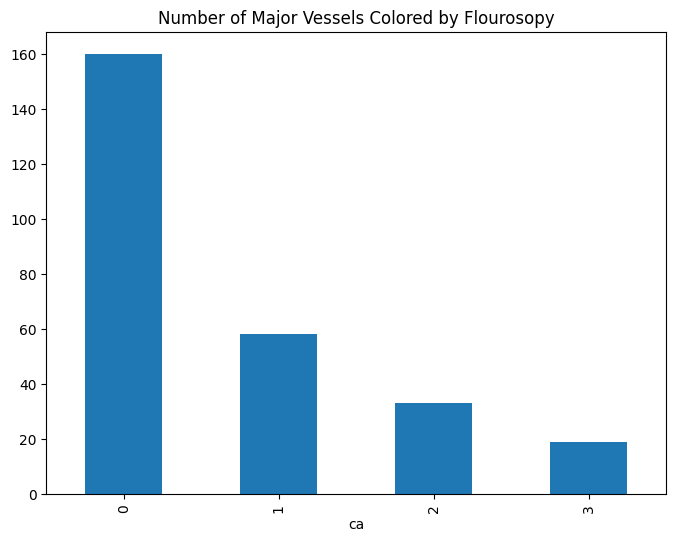

In [60]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy',
                                            figsize = (8, 6))
plt.show()

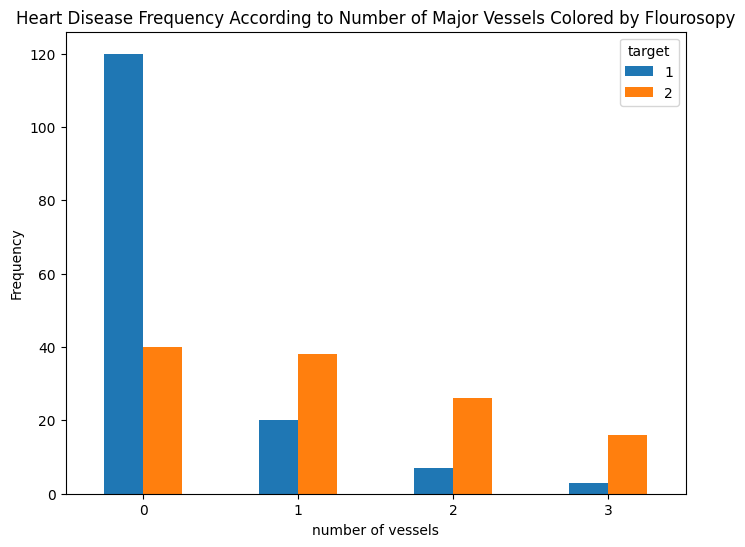

In [61]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

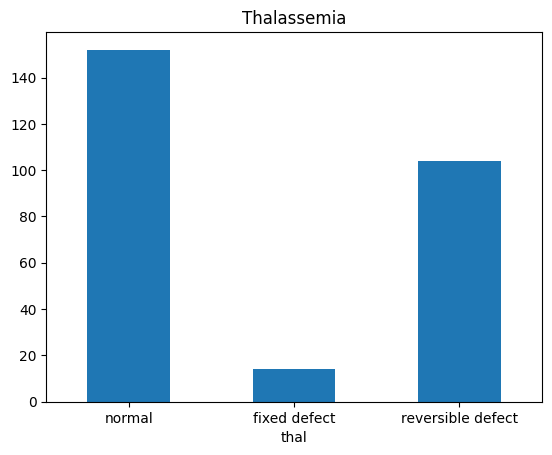

In [62]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

### The correlation between heart disease, cp and exang

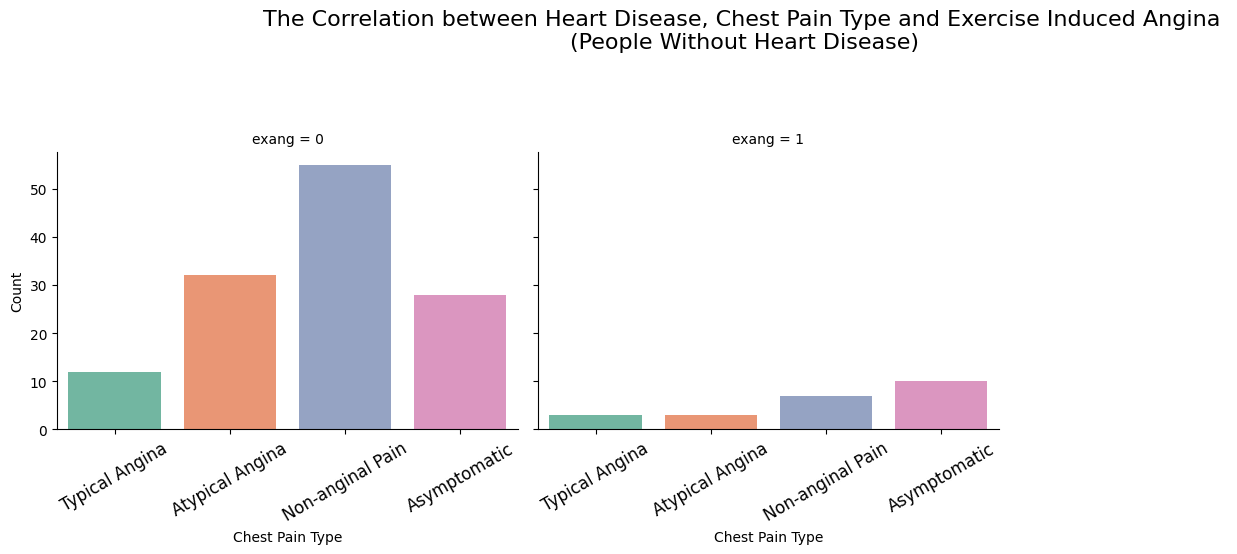

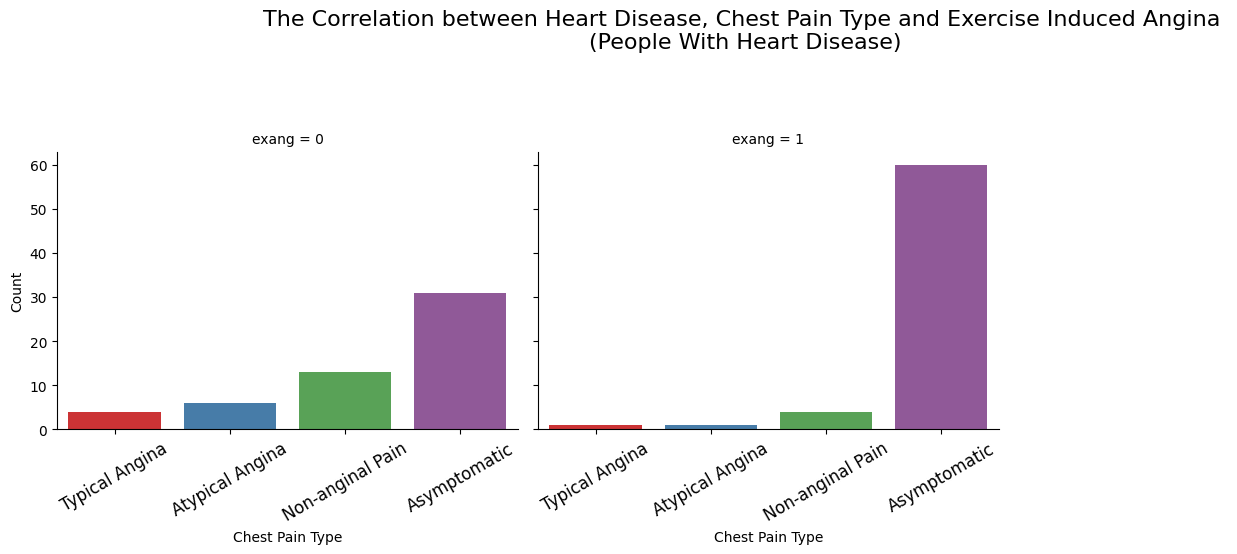

In [63]:
g = sns.catplot(
    x="cp", col="exang", col_wrap=3, kind="count",
    data=df[df['target'] == 1],
    palette='Set2'
)

g.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=30, fontsize=12)
g.set_axis_labels("Chest Pain Type", "Count")
g.fig.suptitle('The Correlation between Heart Disease, Chest Pain Type and Exercise Induced Angina \n(People Without Heart Disease)', y=1.1, fontsize=16)
plt.tight_layout()
plt.show()

# For people with heart disease
g = sns.catplot(
    x="cp", col="exang", col_wrap=3, kind="count",
    data=df[df['target'] == 2],
    palette='Set1'
)

g.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=30, fontsize=12)
g.set_axis_labels("Chest Pain Type", "Count")
g.fig.suptitle('The Correlation between Heart Disease, Chest Pain Type and Exercise Induced Angina \n(People With Heart Disease)', y=1.1, fontsize=16)
plt.tight_layout()
plt.show()

**Note:**

The people who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.


### The correlation between oldpeak, slope and target

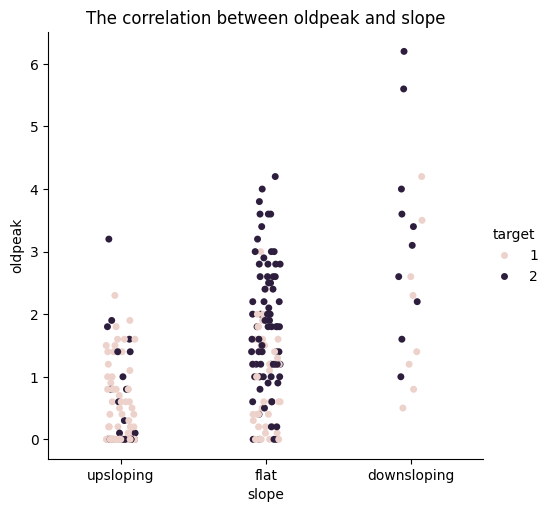

In [64]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

**Note:**

Flat slope and downsloping have higher values of ST depression.

### The correlation between ca and age

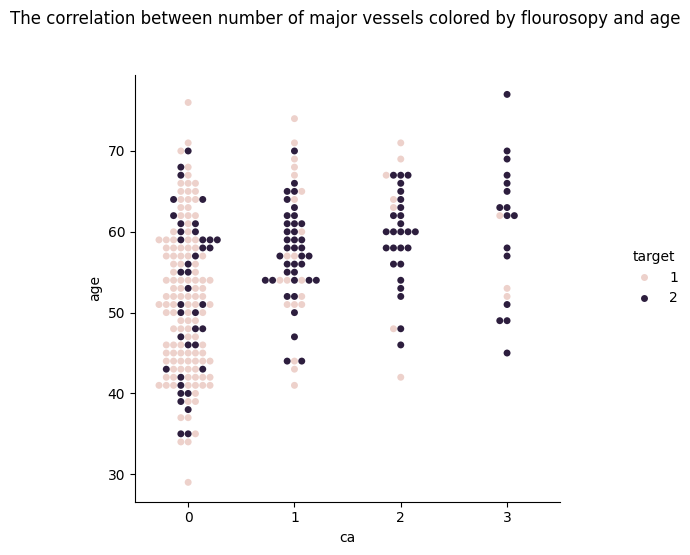

In [65]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = df, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

**Note:**

The older people are more likely to have vessels colored by flourosopy.

### The correlation between age and thalach

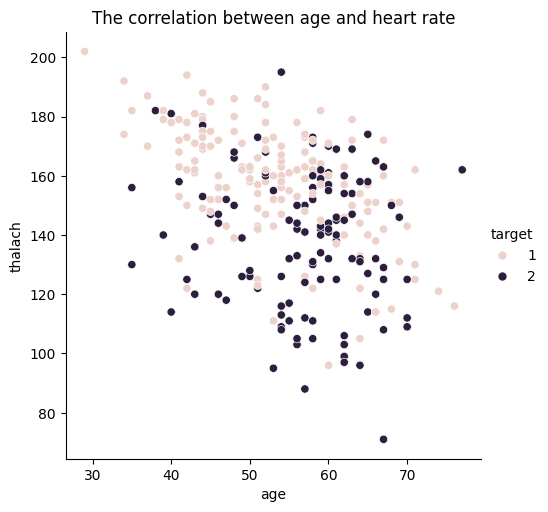

In [66]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

**Note:**

The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease.

## 3. Modeling

### 3.1. Prepare Data for Machine Learning

In [68]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [69]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [74]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [75]:
# Evaluation Metrics

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")

Accuracy Score: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54


Confusion Matrix:



In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
df['target'] = df['target'].replace({1: 0, 2: 1})

In [81]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

# **Change 2: Re-split data after target update**
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# ... (your existing code for model training and evaluation) ...

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)


Model: Decision Tree
Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.78      0.75      0.77        24

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54

Confusion Matrix:
 [[25  5]
 [ 6 18]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.7962962962962963
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.81      0.71      0.76        24

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.79        54

Confusion Matrix:
 [[26  4]
 [ 7 17]]
--------------------------------------------------
Model: SVM
Accuracy:

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Define parameter grids
param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_models = {}
test_accuracies = {}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Tuning Hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_models[name] = {
        'model': grid_search.best_estimator_,
        'score': grid_search.best_score_
    }

    print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Best CV Score for {name}: {grid_search.best_score_}")
    print("-"*50)

    # Evaluate on Test Data
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_acc

    print(f"Test Accuracy for {name}: {test_acc}")
    print("-"*50)

# Select Best Performing Model based on Test Accuracy
best_model_name = max(test_accuracies, key=test_accuracies.get)
final_model = best_models[best_model_name]['model']

print(f"\nBest Performing Model is: {best_model_name}")
print(f"Test Accuracy: {test_accuracies[best_model_name]}")

# Evaluate Final Model
y_pred = final_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the Final Best Model
joblib.dump(final_model, "best_model.pkl")

print(f"\nBest Model ({best_model_name}) Saved Successfully!")
# Removed the stray 'v' which was causing the NameError

Tuning Hyperparameters for Decision Tree...
Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Best CV Score for Decision Tree: 0.8245243128964059
--------------------------------------------------
Test Accuracy for Decision Tree: 0.7407407407407407
--------------------------------------------------
Tuning Hyperparameters for Random Forest...
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score for Random Forest: 0.8659619450317125
--------------------------------------------------
Test Accuracy for Random Forest: 0.7407407407407407
--------------------------------------------------
Tuning Hyperparameters for SVM...
Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score for SVM: 0.8613107822410149
--------------------------------------------------
Test Accuracy for SVM: 0.7777777777777778
----------------------------------------

### 3.3. The Important Features

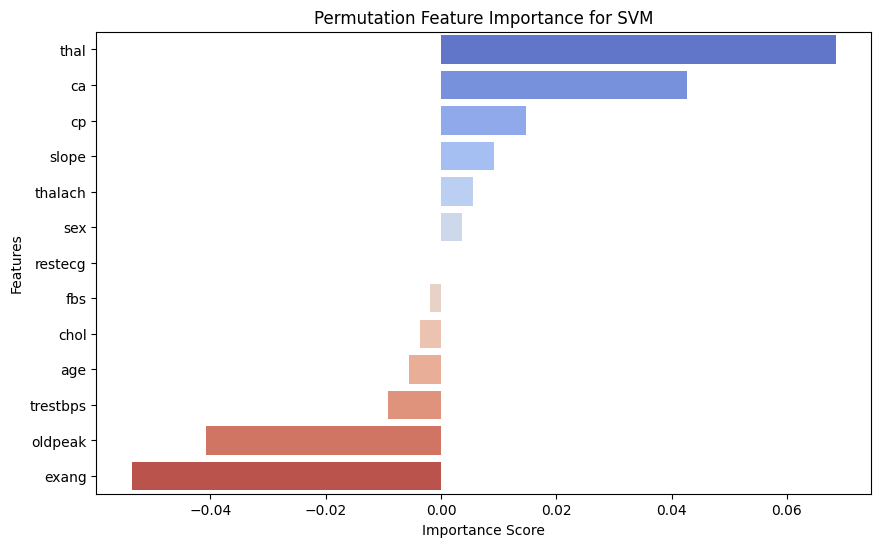

In [96]:
from sklearn.inspection import permutation_importance

result = permutation_importance(final_model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.Series(result.importances_mean, index=features.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance_df, y=importance_df.index, palette='coolwarm')
plt.title(f'Permutation Feature Importance for {best_model_name}')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### 3.4. Save Model

 Finally, I will save the GradientBoostingClassifier model to use it later.

In [99]:
import pickle

with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## 4. Summary

As a summary, in this note book, I used a heart disease dataset to build a classification model. I started with data exploration, then data preperation. After that, I built five models for heart disease classification. Finally, I selected the best model and save it to use it latter.
    